In [68]:
import pandas as pd
import numpy as np

In [69]:
kelp_df = pd.read_csv(r"C:\Users\Natha\OneDrive\Desktop\Prosperity\prosperity25\kelp.csv")
#Need to replace this with path to wherever the kelp data is

In [70]:
kelp_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
1,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
2,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0
3,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0
4,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0
1996,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0
1997,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0
1998,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0


In [71]:
train_df = kelp_df.iloc[:int(len(kelp_df) * 0.75)]

In [72]:
test_df = kelp_df.drop(train_df.index, axis = 0)

C:\Users\Natha\AppData\Local\Temp\ipykernel_35376\2683841304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])


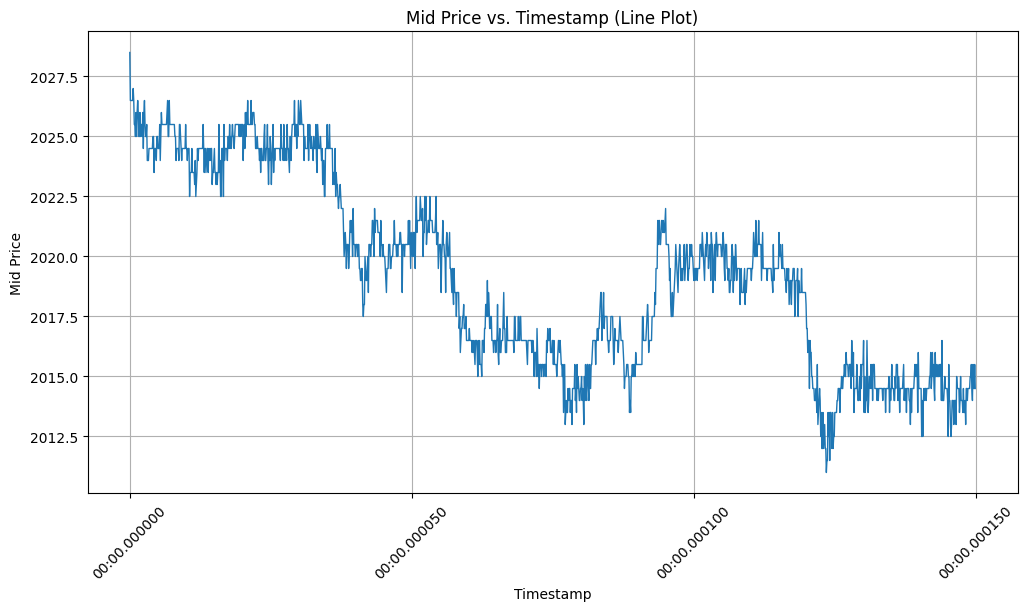

In [73]:
import matplotlib.pyplot as plt  

# Ensure timestamp is in datetime format
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])

# Sort values by timestamp to avoid line connection issues
train_df = train_df.sort_values(by="timestamp")

# Line plot of mid_price over time
plt.figure(figsize=(12, 6))
plt.plot(train_df["timestamp"], train_df["mid_price"], linestyle="-", linewidth=1)

# Formatting the plot
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Mid Price vs. Timestamp (Line Plot)")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


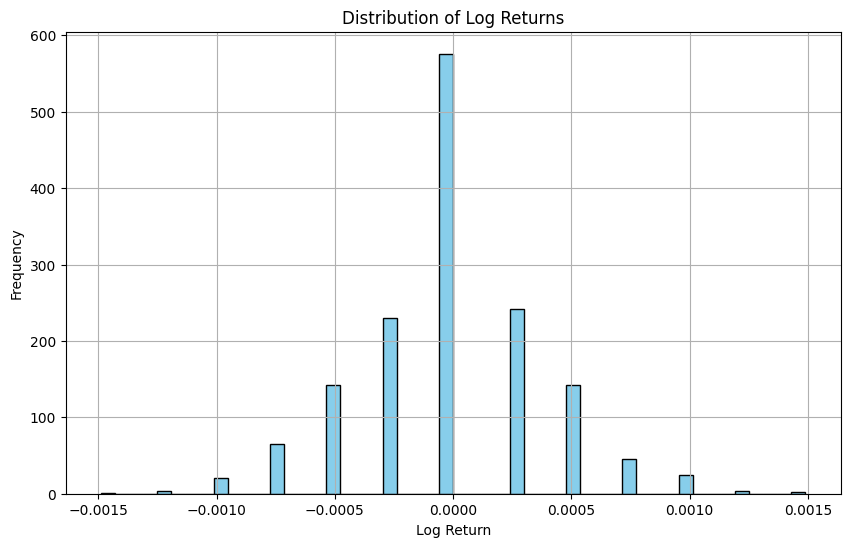

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate log return
train_df['log_return'] = np.log(train_df['mid_price'] / train_df['mid_price'].shift(1))

# Drop the NaN value created due to the shift operation
train_df.dropna(subset=['log_return'], inplace=True)

# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(train_df['log_return'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Distribution of Log Returns')
plt.grid(True)
plt.show()


Returns distribution seems relatively normal

In [75]:
# Calculate lag-1 return
train_df['lag_1_return'] = train_df['log_return'].shift(1)

# Drop any NaN values that result from the shift operation
train_df.dropna(subset=['log_return', 'lag_1_return'], inplace=True)

# Calculate the correlation between log_return and lag_1_return
correlation = train_df['log_return'].corr(train_df['lag_1_return'])

# Print the correlation
print(f"Correlation between log return and lag-1 return: {correlation}")


Correlation between log return and lag-1 return: -0.4513544134851255


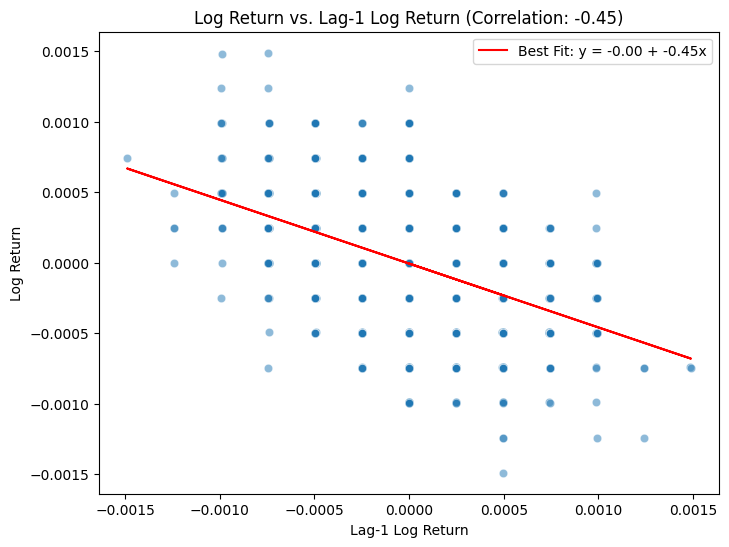

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate lag-1 return (already done earlier)
train_df['lag_1_return'] = train_df['log_return'].shift(1)

# Drop any NaN values that result from the shift operation
train_df.dropna(subset=['log_return', 'lag_1_return'], inplace=True)

# Calculate the correlation between log_return and lag_1_return
correlation = train_df['log_return'].corr(train_df['lag_1_return'])

# Perform linear regression to get the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(train_df['lag_1_return'], train_df['log_return'])

# Create the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lag_1_return', y='log_return', data=train_df, alpha=0.5)

# Plot the line of best fit
plt.plot(train_df['lag_1_return'], intercept + slope * train_df['lag_1_return'], color='red', label=f'Best Fit: y = {intercept:.2f} + {slope:.2f}x')

# Add labels and title
plt.xlabel("Lag-1 Log Return")
plt.ylabel("Log Return")
plt.title(f"Log Return vs. Lag-1 Log Return (Correlation: {correlation:.2f})")

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [77]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation and p-value between log_return and lag_1_return
corr, p_value = pearsonr(train_df['log_return'], train_df['lag_1_return'])

# Output the correlation and p-value
print(f"Correlation between log returns and lag-1 log returns: {corr:.2f}")
print(f"P-value for the correlation: {p_value:.100f}")


Correlation between log returns and lag-1 log returns: -0.45
P-value for the correlation: 0.0000000000000000000000000000000000000000000000000000000000000000000000000002229396790748638657191322


There is a very statistically significant correlation between the log returns and the lag 1 log returns. What about the other lags?

<Figure size 1000x600 with 0 Axes>

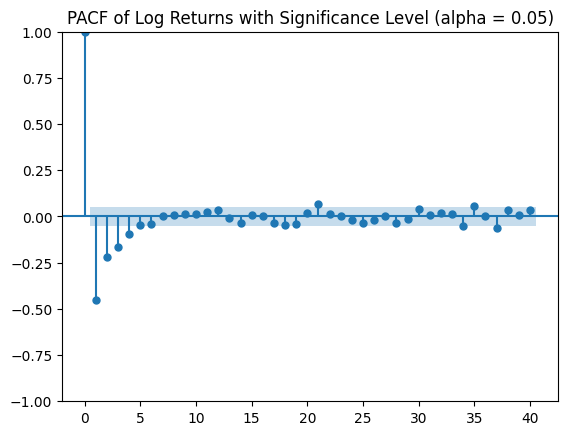

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Set the alpha for significance level (e.g., 95% confidence interval)
alpha = 0.05

# Plot the PACF with significance intervals
plt.figure(figsize=(10, 6))
plot_pacf(train_df['log_return'], lags=40, alpha=alpha)
plt.title("PACF of Log Returns with Significance Level (alpha = 0.05)")
plt.show()


It seems from the PACF graph the last 4 log returns are significant. Lets create a linear regression using these features.

In [79]:
import numpy as np
import pandas as pd

# Calculate log returns if not already done
train_df['log_return'] = np.log(train_df['mid_price'] / train_df['mid_price'].shift(1))

# Create lagged return columns (lag-1, lag-2, lag-3, lag-4)
for lag in range(1, 5):
    train_df[f'lag_{lag}_return'] = train_df['log_return'].shift(lag)

# Display the first few rows to verify
print(train_df[['log_return', 'lag_1_return', 'lag_2_return', 'lag_3_return', 'lag_4_return']].head())


   log_return  lag_1_return  lag_2_return  lag_3_return  lag_4_return
3         NaN           NaN           NaN           NaN           NaN
4    0.000000           NaN           NaN           NaN           NaN
5    0.000000      0.000000           NaN           NaN           NaN
6    0.000247      0.000000           0.0           NaN           NaN
7   -0.000247      0.000247           0.0           0.0           NaN


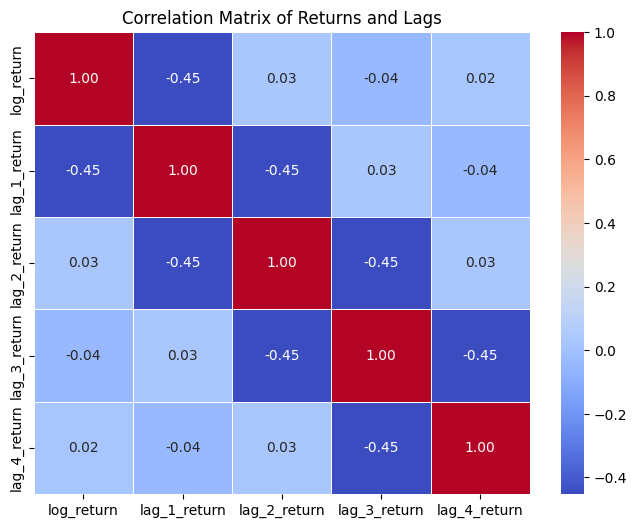

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train_df[['log_return', 'lag_1_return', 'lag_2_return', 'lag_3_return', 'lag_4_return']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Returns and Lags')
plt.show()


In [81]:
train_df = train_df.dropna(subset = ['lag_1_return', 'lag_2_return', 'lag_3_return', 'lag_4_return'])

From the correlation matrix we can already see that the later lagged returns are not as useful at predicting price as their correlations are fairly low.

In [82]:
import statsmodels.api as sm

# Define the features (lag returns) and target variable
X = train_df[['lag_1_return', 'lag_2_return', 'lag_3_return', 'lag_4_return']]  # Lag features
y = train_df['log_return']  # Target variable

# Add constant for intercept to the features
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Print the R-squared value
print(f"R-squared: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          3.51e-100
Time:                        18:14:17   Log-Likelihood:                 9848.0
No. Observations:                1492   AIC:                        -1.969e+04
Df Residuals:                    1487   BIC:                        -1.966e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.863e-06   8.54e-06     -1.038   

As expected, there are strong multicollinearity issues as the lag n feature is correlated with the lag n + 1 feature

In [83]:
import statsmodels.api as sm

# Define the features (lag returns) and target variable
X = train_df[['lag_1_return']]  # Lag features
y = train_df['log_return']  # Target variable

# Add constant for intercept to the features
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Print the R-squared value
print(f"R-squared: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     383.1
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.24e-76
Time:                        18:14:17   Log-Likelihood:                 9783.6
No. Observations:                1492   AIC:                        -1.956e+04
Df Residuals:                    1490   BIC:                        -1.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.706e-06    8.9e-06     -0.641   

It makes more sense that the constant should be 0.

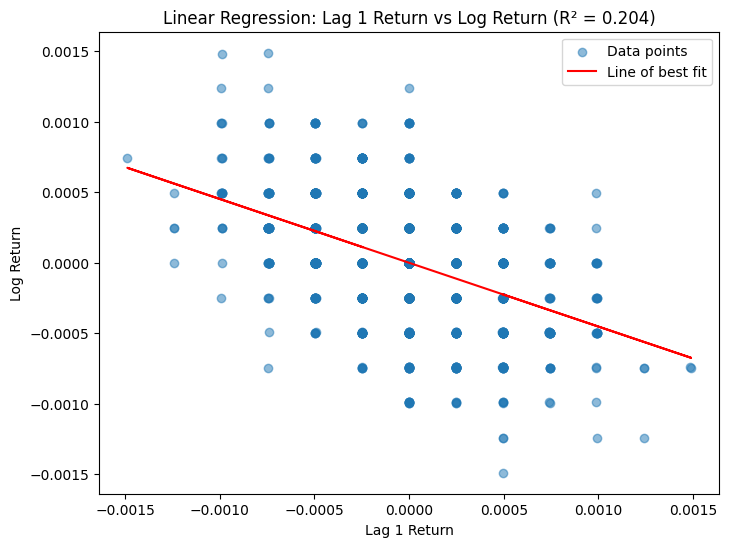

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the features (lag returns) and target variable
X = train_df[['lag_1_return']]  # Lag features
y = train_df['log_return']  # Target variable

# Fit the linear regression model without a constant (intercept)
model = sm.OLS(y, X).fit()

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X['lag_1_return'], y, alpha=0.5, label="Data points")
plt.plot(X['lag_1_return'], model.fittedvalues, color='red', label="Line of best fit")

# Add labels and title
plt.xlabel('Lag 1 Return')
plt.ylabel('Log Return')
plt.title(f'Linear Regression: Lag 1 Return vs Log Return (R² = {model.rsquared:.3f})')

# Show legend
plt.legend()

# Display the plot
plt.show()


Lets look at the lagged return on a different timescale, lets aggregate by every 10 timestamps.

In [85]:
# Create a new feature that is the sum of the last 10 log returns (including current one)
train_df['10log_return'] = train_df['log_return'].rolling(window=10).sum()

# Drop rows with NA values (if any, due to the rolling window)
train_df.dropna(subset = ['10log_return'], inplace = True)


In [86]:
train_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_3,ask_volume_3,mid_price,profit_and_loss,log_return,lag_1_return,lag_2_return,lag_3_return,lag_4_return,10log_return
17,-1,1970-01-01 00:00:00.000001700,KELP,2024,22,NaN,NaN,NaN,NaN,2026,...,NaN,NaN,2025.0,0.0,0.000000,-0.000494,-0.000247,0.000247,0.000494,-7.404665e-04
18,-1,1970-01-01 00:00:00.000001800,KELP,2024,23,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,2026.0,0.0,0.000494,0.000000,-0.000494,-0.000247,0.000247,2.468222e-04
19,-1,1970-01-01 00:00:00.000001900,KELP,2024,29,NaN,NaN,NaN,NaN,2026,...,NaN,NaN,2025.0,0.0,-0.000494,0.000494,0.000000,-0.000494,-0.000247,-2.468831e-04
20,-1,1970-01-01 00:00:00.000002000,KELP,2024,26,NaN,NaN,NaN,NaN,2027,...,NaN,NaN,2025.5,0.0,0.000247,-0.000494,0.000494,0.000000,-0.000494,2.468831e-04
21,-1,1970-01-01 00:00:00.000002100,KELP,2024,27,NaN,NaN,NaN,NaN,2027,...,NaN,NaN,2025.5,0.0,0.000000,0.000247,-0.000494,0.000494,0.000000,-2.468222e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1,1970-01-01 00:00:00.000149500,KELP,2015,1,2013.0,32.0,NaN,NaN,2016,...,NaN,NaN,2015.5,0.0,0.000745,-0.000248,-0.000496,0.000248,0.000000,7.445093e-04
1496,-1,1970-01-01 00:00:00.000149600,KELP,2013,32,NaN,NaN,NaN,NaN,2016,...,NaN,NaN,2014.5,0.0,-0.000496,0.000745,-0.000248,-0.000496,0.000248,-1.884343e-16
1497,-1,1970-01-01 00:00:00.000149700,KELP,2013,1,2012.0,28.0,NaN,NaN,2016,...,NaN,NaN,2014.5,0.0,0.000000,-0.000496,0.000745,-0.000248,-0.000496,-1.884343e-16
1498,-1,1970-01-01 00:00:00.000149800,KELP,2015,1,2013.0,1.0,2012.0,20.0,2016,...,NaN,NaN,2015.5,0.0,0.000496,0.000000,-0.000496,0.000745,-0.000248,4.962779e-04


In [87]:
# Create a lagged version of the 10log_return by shifting it by 10 periods
train_df['lagged_10log_return'] = train_df['10log_return'].shift(10)


                                 OLS Regression Results                                
Dep. Variable:           10log_return   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              56.65
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    9.03e-14
Time:                        18:14:19   Log-Likelihood:                          8980.5
No. Observations:                1473   AIC:                                 -1.796e+04
Df Residuals:                    1472   BIC:                                 -1.795e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

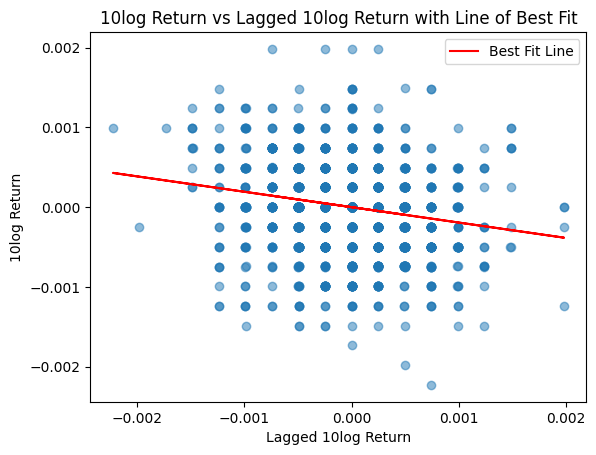

In [88]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Drop any rows where either of the two columns have NaN values
train_df_clean = train_df.dropna(subset=['10log_return', 'lagged_10log_return'])

# Define the features and target variable
X = train_df_clean[['lagged_10log_return']]  # Lagged feature
y = train_df_clean['10log_return']  # Target variable

# Fit the linear regression model without adding a constant
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Calculate the correlation between the two features
correlation = train_df_clean['10log_return'].corr(train_df_clean['lagged_10log_return'])
print(f"Correlation: {correlation}")

# Print the R-squared value
print(f"R-squared: {results.rsquared}")

# Plot the results with a line of best fit
plt.scatter(train_df_clean['lagged_10log_return'], train_df_clean['10log_return'], alpha=0.5)
plt.plot(train_df_clean['lagged_10log_return'], results.fittedvalues, color='red', label="Best Fit Line")
plt.xlabel('Lagged 10log Return')
plt.ylabel('10log Return')
plt.title('10log Return vs Lagged 10log Return with Line of Best Fit')
plt.legend()
plt.show()


It seems like the correlations are much worse when we aggregate over time periods. Hence we will stick with a minutely strategy.
We'll try an active market taking strategy that trades when current price is out of line with our log-return prediction. It is likely to not be very profitable due to bid ask spread. perhaps we can try market making around our predicted midprice instead, especially given that the market has a lot of bots.